In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [28]:
#checking for null values
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## **#There is no null values in the dataset**

In [29]:
data.duplicated().sum()

np.int64(0)

In [30]:
#we can see that there is no duplicated values means data is very good and clean we can proceed further

In [31]:
#Checking for data types
data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [32]:
#we can see that the column TotalCharges is object type but it contains numercal values so we have to
#change the data type of the column

In [33]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [34]:
data['TotalCharges'].dtype

dtype('float64')

In [35]:
data['TotalCharges'].isnull().sum()

np.int64(11)


we have change the datatype of the column successfully but we found null values in the column TotalCharges
we have to handle those null values




In [36]:
data = data.dropna()

In [37]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [38]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [39]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Outlier checking in the numerical columns

Plotting box plots for numerical columns to visualize outliers:


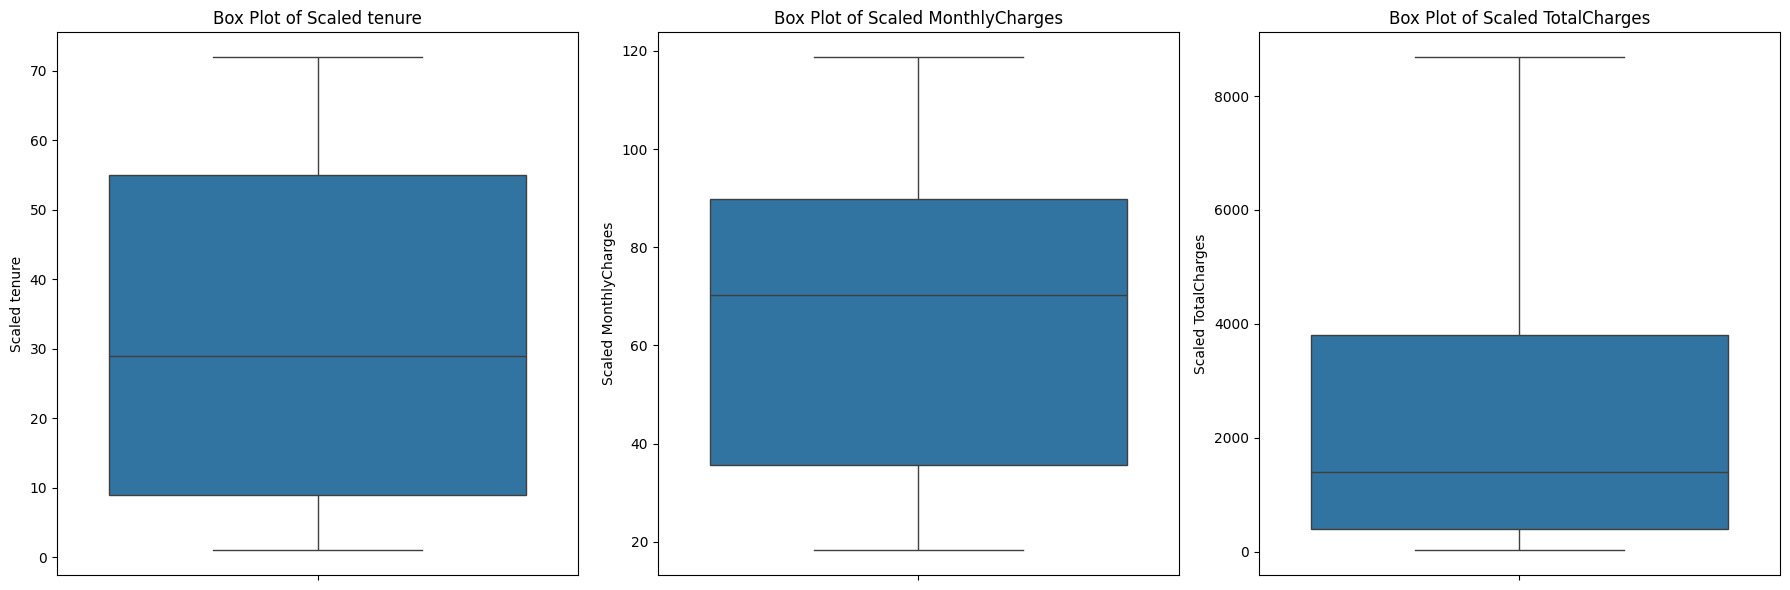

In [40]:
#outlier check in numerical columns
# Plotting box plots for all numerical columns to visualize outliers

# Select the numerical columns from the scaled data for plotting
numerical_cols_for_plotting = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("Plotting box plots for numerical columns to visualize outliers:")

# Determine the number of plots needed
n_cols = len(numerical_cols_for_plotting)
n_rows = (n_cols + 2) // 3 # Calculate number of rows needed, max 3 columns per row

# Create subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 6)) # Adjust figure size as needed
axes = axes.flatten() # Flatten the axes array if it's 2D

# Iterate through the numerical columns and create a box plot for each
for i, col in enumerate(numerical_cols_for_plotting):
    sns.boxplot(y=data[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of Scaled {col}')
    axes[i].set_ylabel(f'Scaled {col}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Adjust layout to prevent titles/labels overlapping
plt.show()

In [41]:
# Check for outliers in numerical columns using the IQR method

# Select the numerical columns from the scaled data
# These are the columns that were originally numerical and have been scaled
numerical_cols_for_outlier_check = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("Checking for outliers in numerical columns:")

for col in numerical_cols_for_outlier_check:
    print(f"\n--- Checking column: {col} ---")

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    # Print the number of outliers found and display them
    print(f"Number of outliers in '{col}': {outliers.shape[0]}")

    if outliers.shape[0] > 0:
        print("Outliers found:")
        # Display the rows containing the outliers for this column
        # We only show the column being checked and the 'Churn' column (as it's the target)
        display(outliers[[col, 'Churn']].head()) # Displaying the first few outliers if many exist
    else:
        print(f"No outliers detected in '{col}' using the IQR method.")

# Note: Outliers in scaled data should be interpreted in the context of the scaling.
# However, the IQR method is scale-invariant, so it will identify the same data points
# as outliers regardless of whether the data is scaled or not, although the bound values will differ.

Checking for outliers in numerical columns:

--- Checking column: tenure ---
Number of outliers in 'tenure': 0
No outliers detected in 'tenure' using the IQR method.

--- Checking column: MonthlyCharges ---
Number of outliers in 'MonthlyCharges': 0
No outliers detected in 'MonthlyCharges' using the IQR method.

--- Checking column: TotalCharges ---
Number of outliers in 'TotalCharges': 0
No outliers detected in 'TotalCharges' using the IQR method.


There is no outlier present in the dataset.

In [42]:
#Now we will check the distribution of the churn vs nonchurn customers

data['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


The dataset shows a churn rate of ~26.5%, indicating a significant business problem. From a modeling point of view, there is moderate class imbalance, which we will address carefully during training and evaluation.

# EDA

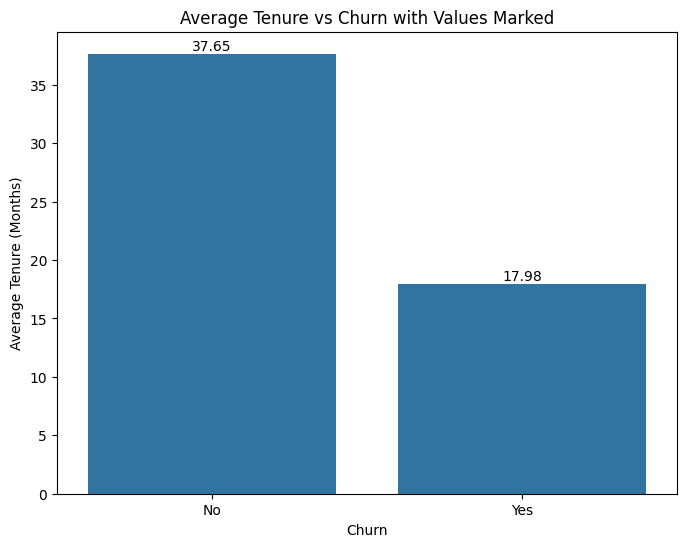

In [43]:
# Calculate the average tenure for each 'Churn' category
avg_tenure_by_churn = data.groupby('Churn')['tenure'].mean().reset_index()

# Create the bar plot using seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Churn', y='tenure', data=avg_tenure_by_churn)
plt.title('Average Tenure vs Churn with Values Marked')
plt.xlabel('Churn')
plt.ylabel('Average Tenure (Months)')

# Add value labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f') # fmt='%.2f' formats the labels to 2 decimal places

plt.show()

We can see that customers with less than 18 months tenure are churn,this means we have to find why new customers are leaving our services.

<ipython-input-44-22a44fe76b60>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Churn', y='MonthlyCharges', data=avg_monthlycharges_by_churn,palette=custom_palette)


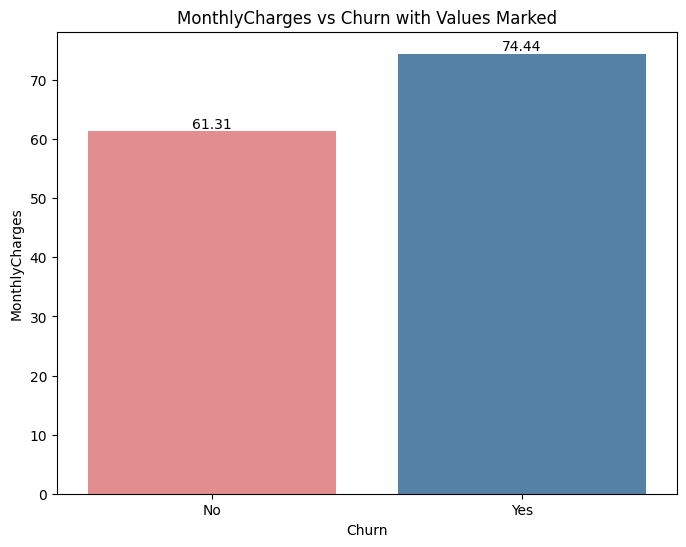

In [44]:
# Calculate the average tenure for each 'Churn' category
avg_monthlycharges_by_churn = data.groupby('Churn')['MonthlyCharges'].mean().reset_index()

# Create the bar plot using seaborn
plt.figure(figsize=(8, 6))
custom_palette = ['lightcoral', 'steelblue']
ax = sns.barplot(x='Churn', y='MonthlyCharges', data=avg_monthlycharges_by_churn,palette=custom_palette)
plt.title('MonthlyCharges vs Churn with Values Marked')
plt.xlabel('Churn')
plt.ylabel('MonthlyCharges')

# Add value labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f') # fmt='%.2f' formats the labels to 2 decimal places

plt.show()

customers who are paying more are leaving services while low paying customers are ennjoying the services provided..

<ipython-input-45-4123903c8214>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Churn', y='TotalCharges', data=avg_totalcharges_by_churn,palette=custom_palette)


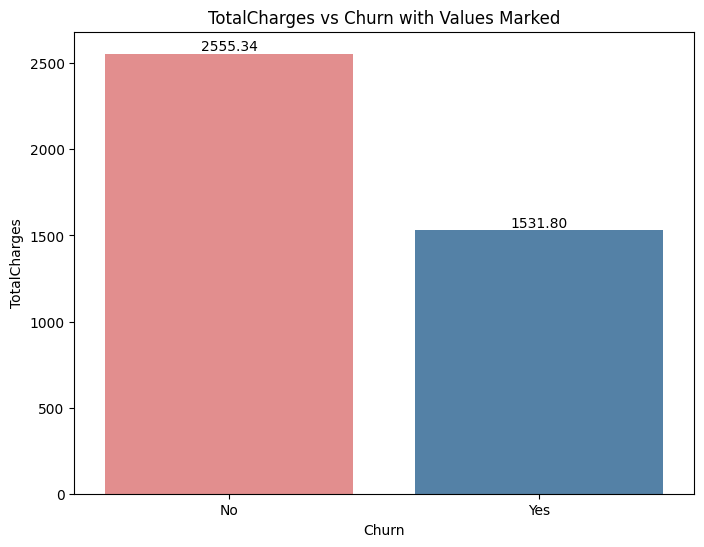

In [45]:
avg_totalcharges_by_churn = data.groupby('Churn')['TotalCharges'].mean().reset_index()

# Create the bar plot using seaborn
plt.figure(figsize=(8, 6))
custom_palette = ['lightcoral', 'steelblue']
ax = sns.barplot(x='Churn', y='TotalCharges', data=avg_totalcharges_by_churn,palette=custom_palette)
plt.title('TotalCharges vs Churn with Values Marked')
plt.xlabel('Churn')
plt.ylabel('TotalCharges')

# Add value labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f') # fmt='%.2f' formats the labels to 2 decimal places

plt.show()

Thats interesting we have seen above that customer who are paying more monthly are leaving but here  we can see that customer who are paying more in longterm services are not leaving but who are paying less are leaving. This means customers are enjoying long term services more than monthly services..

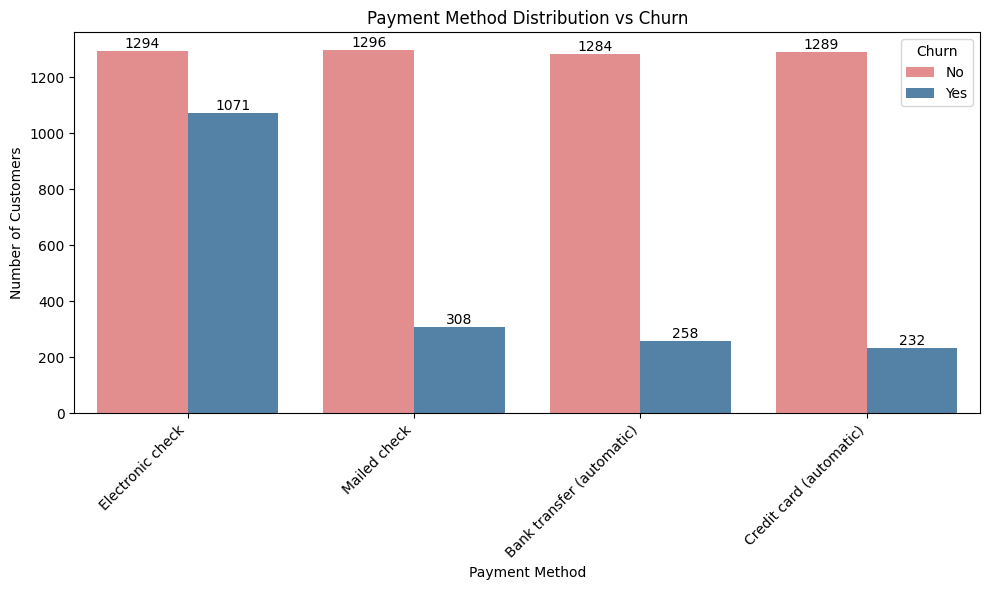

In [46]:
# Assuming 'data' is your DataFrame with 'Churn' and 'PaymentMethod' columns

# Create a count plot to visualize the distribution of PaymentMethod by Churn status
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='PaymentMethod', hue='Churn', data=data, palette=custom_palette) # Pass the data DataFrame and use hue for churn

plt.title('Payment Method Distribution vs Churn')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')

# Add count labels on top of the bars
for container in ax.containers:
    ax.bar_label(container)

plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

Electronic check in payment is one of the reason to churn. its clearly visible customers not liking this payment method.

# Feature Engineering & Preprocessing

In [47]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:
#Drop the unneccessary columns
data.drop(['customerID'],axis=1,inplace=True)


<ipython-input-48-d11a33581fe3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['customerID'],axis=1,inplace=True)


In [49]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

we have to drop the customerid column beacause it is not necessary for our model building

# Encode Categorical Variables

In [50]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# 'Churn' is our target, let's convert it to numerical (Yes=1, No=0)
# This is often done after encoding the features
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# Now remove 'Churn' from the list of columns to be one-hot encoded
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

# Handle 'gender' - it's binary and can be mapped to 0/1
# Mapping is often simpler than one-hot encoding for binary variables
if 'gender' in categorical_cols:
    data['gender'] = data['gender'].map({'Female': 0, 'Male': 1})
    categorical_cols.remove('gender') # Remove from list to be one-hot encoded

# Apply One-Hot Encoding to the remaining categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True) # drop_first=True to avoid multicollinearity

print("Original DataFrame Shape:", data.shape)
print("Encoded DataFrame Shape:", data_encoded.shape)
print("\nEncoded DataFrame Head:")
print(data_encoded.head())



Original DataFrame Shape: (7032, 20)
Encoded DataFrame Shape: (7032, 31)

Encoded DataFrame Head:
   gender  SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  \
0       0              0       1           29.85         29.85      0   
1       1              0      34           56.95       1889.50      0   
2       1              0       2           53.85        108.15      1   
3       1              0      45           42.30       1840.75      0   
4       0              0       2           70.70        151.65      1   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                            True  ...                            False   


<ipython-input-50-bace7619175e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})
<ipython-input-50-bace7619175e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gender'] = data['gender'].map({'Female': 0, 'Male': 1})


In [51]:
data_encoded.columns

Index(['gender', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

# Feature Scaling

In [52]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Select the numerical columns to scale
numerical_cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected numerical columns and transform them
# We use .values to get a NumPy array, as StandardScaler expects array-like input
scaled_numerical_data = scaler.fit_transform(data_encoded[numerical_cols_to_scale])

# Create a new DataFrame with the scaled numerical data and the original column names
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_cols_to_scale, index=data_encoded.index)

# Drop the original numerical columns from the encoded DataFrame
data_encoded_dropped_numerical = data_encoded.drop(columns=numerical_cols_to_scale)

# Concatenate the scaled numerical DataFrame with the rest of the encoded DataFrame
data_scaled = pd.concat([data_encoded_dropped_numerical, scaled_numerical_df], axis=1)

print("Original DataFrame Shape:", data_encoded.shape)
print("Scaled DataFrame Shape:", data_scaled.shape)
print("\nScaled DataFrame Head:")
print(data_scaled.head())

# Check the statistics of the scaled columns to confirm scaling
print("\nStatistics of Scaled Numerical Columns:")
print(data_scaled[numerical_cols_to_scale].describe())

Original DataFrame Shape: (7032, 31)
Scaled DataFrame Shape: (7032, 31)

Scaled DataFrame Head:
   gender  SeniorCitizen  Churn  Partner_Yes  Dependents_Yes  \
0       0              0      0         True           False   
1       1              0      0        False           False   
2       1              0      1        False           False   
3       1              0      0        False           False   
4       0              0      1        False           False   

   PhoneService_Yes  MultipleLines_No phone service  MultipleLines_Yes  \
0             False                            True              False   
1              True                           False              False   
2              True                           False              False   
3             False                            True              False   
4              True                           False              False   

   InternetService_Fiber optic  InternetService_No  ...  StreamingMovies_Y

In [53]:
data_scaled.isnull().sum()

,0
gender,0
SeniorCitizen,0
Churn,0
Partner_Yes,0
Dependents_Yes,0
PhoneService_Yes,0
MultipleLines_No phone service,0
MultipleLines_Yes,0
InternetService_Fiber optic,0
InternetService_No,0


In [54]:
data_scaled

,gender,SeniorCitizen,Churn,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,0,True,False,False,True,False,False,False,...,False,False,False,True,False,True,False,-1.280248,-1.161694,-0.994194
1,1,0,0,False,False,True,False,False,False,False,...,False,True,False,False,False,False,True,0.064303,-0.260878,-0.173740
2,1,0,1,False,False,True,False,False,False,False,...,False,False,False,True,False,False,True,-1.239504,-0.363923,-0.959649
3,1,0,0,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,0.512486,-0.747850,-0.195248
4,0,0,1,False,False,True,False,False,True,False,...,False,False,False,True,False,True,False,-1.239504,0.196178,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,True,True,True,False,True,False,False,...,True,True,False,True,False,False,True,-0.343137,0.664868,-0.129180
7039,0,0,0,True,True,True,False,True,True,False,...,True,True,False,True,True,False,False,1.612573,1.276493,2.241056
7040,0,0,0,True,True,False,True,False,False,False,...,False,False,False,True,False,True,False,-0.872808,-1.170004,-0.854514
7041,1,1,1,True,False,True,False,True,True,False,...,False,False,False,True,False,False,True,-1.158016,0.319168,-0.872095


# Correlation/Multicollinearity Check

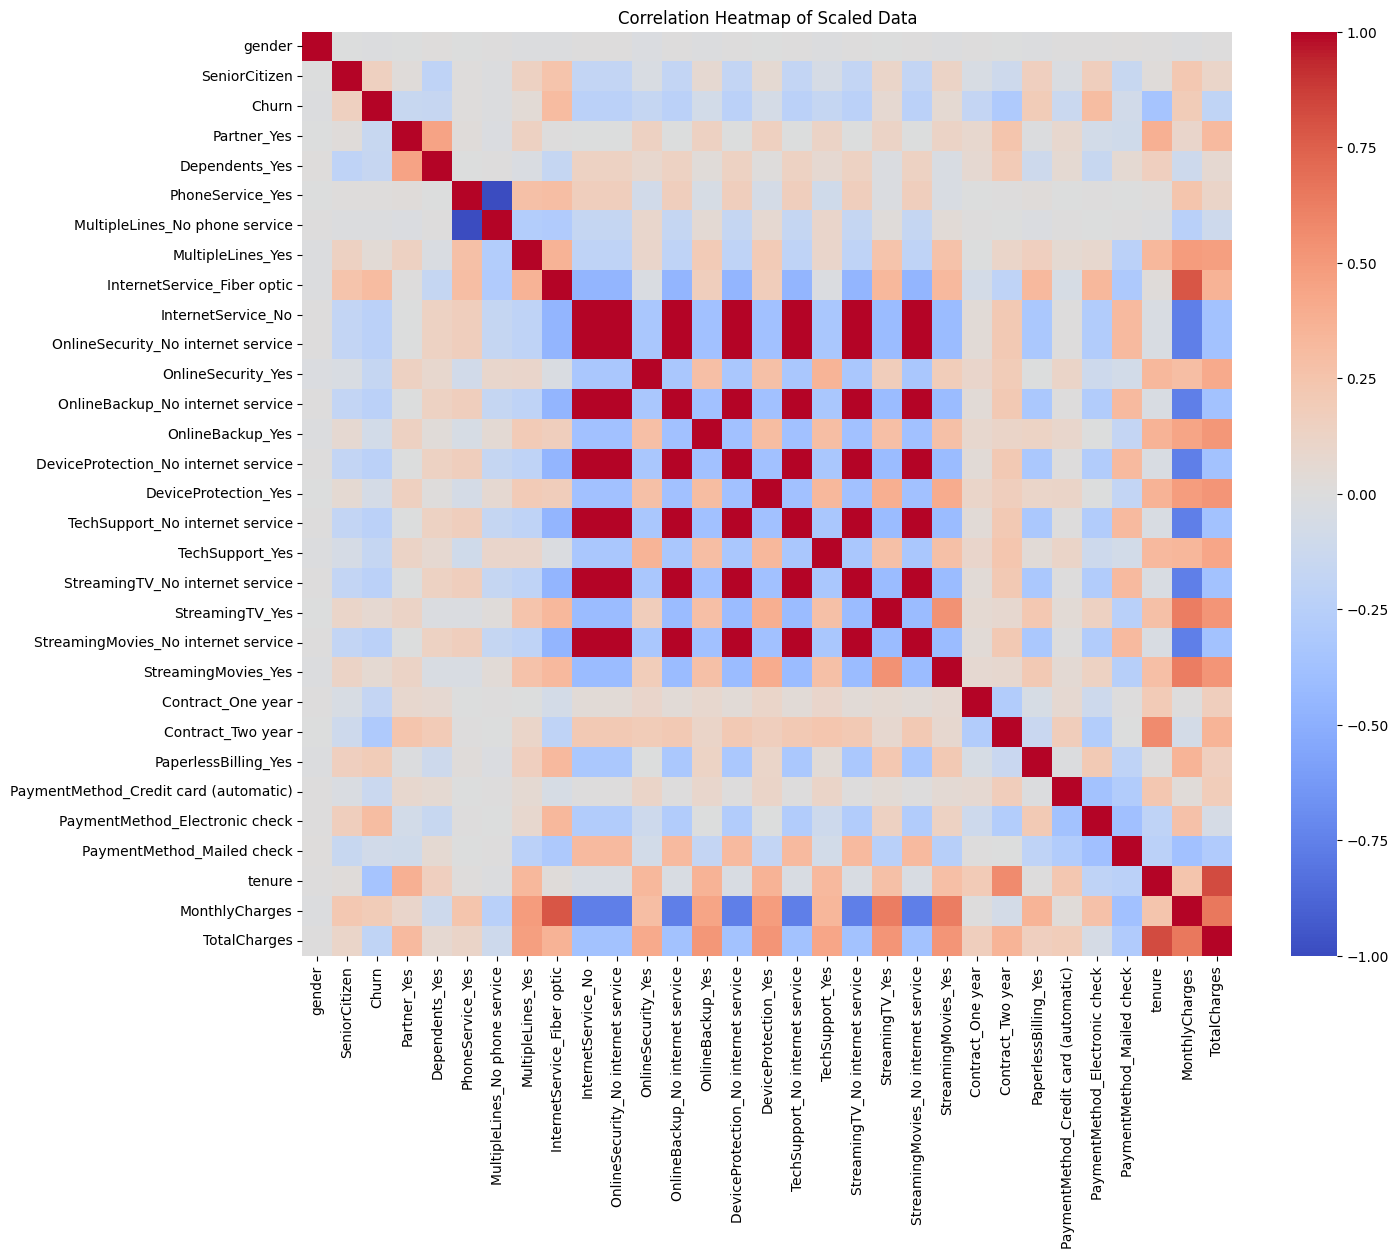

In [55]:
#plot heat map
# Calculate the correlation matrix
correlation_matrix = data_scaled.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 12)) # Adjust size as needed

# Create the heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
# annot=True shows the correlation values on the heatmap cells
# cmap='coolwarm' uses a diverging colormap, good for correlations
# fmt=".2f" formats the annotation values to 2 decimal places if annot=True

plt.title('Correlation Heatmap of Scaled Data')
plt.show()



In [56]:
data_scaled.columns

Index(['gender', 'SeniorCitizen', 'Churn', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [57]:
data_scaled.columns

Index(['gender', 'SeniorCitizen', 'Churn', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [58]:
encoded_columns = data_scaled.columns.difference(data.columns)
print("Newly Created Encoded Features:\n", encoded_columns)


Newly Created Encoded Features:
 Index(['Contract_One year', 'Contract_Two year', 'Dependents_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'PaperlessBilling_Yes', 'Partner_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'PhoneService_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'StreamingTV_No internet service',
       'StreamingTV_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes'],
      dtype='object')


In [59]:
model_data = data_scaled.copy()

# **Model Building, Evaluation & Selection**

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#Now we will split data into Train and Test for model building

x = model_data.drop('Churn', axis=1)
y = model_data['Churn']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [61]:
X_train

,gender,SeniorCitizen,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
6030,0,0,False,False,False,True,False,False,False,False,...,True,False,False,True,False,False,False,0.430998,-0.523477,-0.091370
3410,1,0,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,-1.198760,-0.378881,-0.924111
5483,0,0,True,False,True,False,True,True,False,False,...,False,False,False,True,False,True,False,0.919926,0.430523,0.959516
5524,1,0,True,True,True,False,False,False,False,False,...,False,False,True,False,False,False,False,0.512486,-0.337331,0.119297
6337,0,0,True,True,True,False,True,True,False,False,...,True,True,False,False,False,False,True,0.919926,1.200040,1.396490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,1,0,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,-1.198760,-0.478603,-0.946811
5199,0,0,False,False,True,False,True,True,False,False,...,True,True,False,True,False,True,False,0.756950,1.552388,1.508839
5235,1,0,False,False,True,False,True,True,False,False,...,False,False,False,True,False,True,False,-0.954296,0.543541,-0.661274
5399,0,0,False,False,True,False,False,False,True,True,...,False,True,False,False,False,False,False,0.716206,-1.497422,-0.571007


In [62]:
X_test

,gender,SeniorCitizen,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
2481,1,1,True,False,True,False,True,False,True,True,...,False,False,True,False,False,False,False,1.164390,-1.322910,-0.344810
6784,0,0,False,False,True,False,True,False,True,True,...,False,False,False,False,False,False,False,-0.546857,-1.332882,-0.801836
6125,1,0,True,False,True,False,True,True,False,False,...,True,False,False,True,True,False,False,-0.791321,1.244914,-0.407790
3052,1,0,True,False,True,False,True,False,False,False,...,False,False,False,True,False,False,True,0.186535,-0.324035,-0.111422
4099,0,0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,-1.076528,-1.174990,-0.936134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,1,0,False,False,True,False,False,False,True,True,...,False,False,False,False,False,False,True,-1.280248,-1.520691,-0.998959
5250,1,0,False,False,True,False,True,True,False,False,...,True,False,False,False,False,True,False,-0.832064,0.988963,-0.489608
5465,0,0,False,False,True,False,False,False,False,False,...,False,True,False,True,False,False,True,-0.261649,-0.290794,-0.322111
5851,0,1,False,False,True,False,True,True,False,False,...,True,True,False,True,False,False,False,0.105047,1.529120,0.685164


In [63]:
y_train.value_counts()

,count
Churn,
0,4130
1,1495


In [64]:
y_test.value_counts()

,count
Churn,
0,1033
1,374


In [65]:
# Now we will train logistic regression model
model = LogisticRegression(max_iter = 1000,class_weight ='balanced',random_state= 42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class (Churn=1)

In [66]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407



In [68]:
print(" Accuracy:", accuracy_score(y_test, y_pred))

 Accuracy: 0.7320540156361052


In [69]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
print(" ROC AUC Score:", roc_auc_score(y_test, y_proba))


 ROC AUC Score: 0.8317526957980235


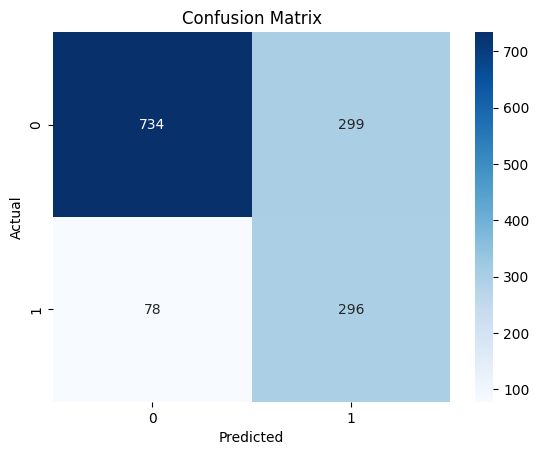

In [70]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

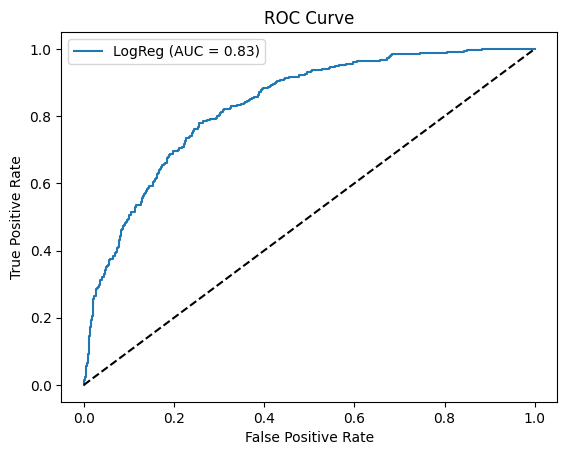

In [71]:
#  ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"LogReg (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [72]:
#Feature Importance
feature_importance = pd.Series(model.coef_[0], index=x.columns)
feature_importance = feature_importance.sort_values(key=abs, ascending=False)

# Show top 10 features
print("\n Top 10 Important Features:")
print(feature_importance.head(10))


 Top 10 Important Features:
Contract_Two year             -1.383743
tenure                        -1.363838
InternetService_Fiber optic    1.106909
Contract_One year             -0.789922
TotalCharges                   0.662962
MonthlyCharges                -0.432404
StreamingMovies_Yes            0.389744
StreamingTV_Yes                0.380769
OnlineSecurity_Yes            -0.352172
PhoneService_Yes              -0.348439
dtype: float64


# Random Forest

In [73]:
# we will now use random forest model
from sklearn.ensemble import RandomForestClassifier

#  Train the model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # Helps with imbalanced data
)
rf_model.fit(X_train, y_train)

# 2. Make predictions
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

# 3. Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(" ROC AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.63      0.45      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407

 Confusion Matrix:
 [[935  98]
 [204 170]]
 ROC AUC Score: 0.8193685905234223


# Train and Evaluate the XGBoost Model

In [87]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    scale_pos_weight=2  # Helps handle class imbalance
)

xgb_model.fit(X_train, y_train)

# 2. Predictions
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]


print(" Classification Report:\n", classification_report(y_test, y_pred))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(" ROC AUC Score:", roc_auc_score(y_test, y_proba))

 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83      1033
           1       0.54      0.74      0.63       374

    accuracy                           0.76      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.76      0.77      1407

 Confusion Matrix:
 [[797 236]
 [ 96 278]]
 ROC AUC Score: 0.8375403140222911


# Top 10 most important features

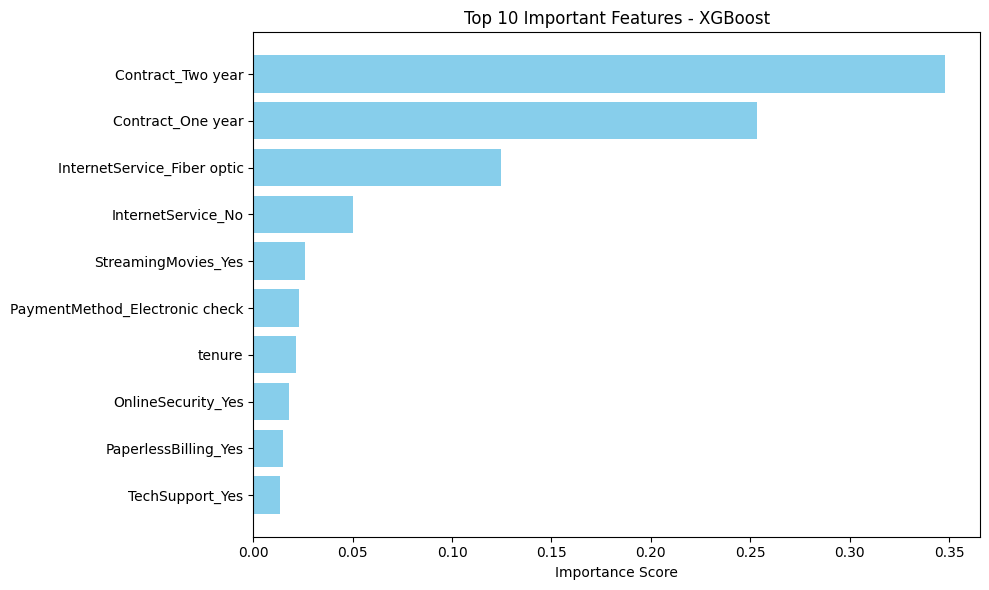

In [88]:
importances = xgb_model.feature_importances_
features = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)


plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top 10 Important Features - XGBoost")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [75]:
data_encoded

,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,29.85,29.85,0,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,1,0,34,56.95,1889.50,0,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,1,0,2,53.85,108.15,1,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,1,0,45,42.30,1840.75,0,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,0,2,70.70,151.65,1,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,24,84.80,1990.50,0,True,True,True,False,...,False,True,False,True,True,False,True,False,False,True
7039,0,0,72,103.20,7362.90,0,True,True,True,False,...,False,True,False,True,True,False,True,True,False,False
7040,0,0,11,29.60,346.45,0,True,True,False,True,...,False,False,False,False,False,False,True,False,True,False
7041,1,1,4,74.40,306.60,1,True,False,True,False,...,False,False,False,False,False,False,True,False,False,True


In [76]:
data_scaled

,gender,SeniorCitizen,Churn,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,0,True,False,False,True,False,False,False,...,False,False,False,True,False,True,False,-1.280248,-1.161694,-0.994194
1,1,0,0,False,False,True,False,False,False,False,...,False,True,False,False,False,False,True,0.064303,-0.260878,-0.173740
2,1,0,1,False,False,True,False,False,False,False,...,False,False,False,True,False,False,True,-1.239504,-0.363923,-0.959649
3,1,0,0,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,0.512486,-0.747850,-0.195248
4,0,0,1,False,False,True,False,False,True,False,...,False,False,False,True,False,True,False,-1.239504,0.196178,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,True,True,True,False,True,False,False,...,True,True,False,True,False,False,True,-0.343137,0.664868,-0.129180
7039,0,0,0,True,True,True,False,True,True,False,...,True,True,False,True,True,False,False,1.612573,1.276493,2.241056
7040,0,0,0,True,True,False,True,False,False,False,...,False,False,False,True,False,True,False,-0.872808,-1.170004,-0.854514
7041,1,1,1,True,False,True,False,True,True,False,...,False,False,False,True,False,False,True,-1.158016,0.319168,-0.872095


# We have seen there is data imbalance for that we will use SMOTE to balance the data.

In [89]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assuming df is your DataFrame and 'Churn' is the target column
X = data_scaled.drop('Churn', axis=1)
y = data_scaled['Churn']

# Split into train and test before SMOTE to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Before SMOTE:", Counter(y_train))

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_train_res))

# Initialize and train Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_res, y_train_res)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Before SMOTE: Counter({0: 4130, 1: 1495})
After SMOTE: Counter({0: 4130, 1: 4130})
Accuracy: 0.7412935323383084
Confusion Matrix:
 [[773 260]
 [104 270]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81      1033
           1       0.51      0.72      0.60       374

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.70      1407
weighted avg       0.78      0.74      0.75      1407



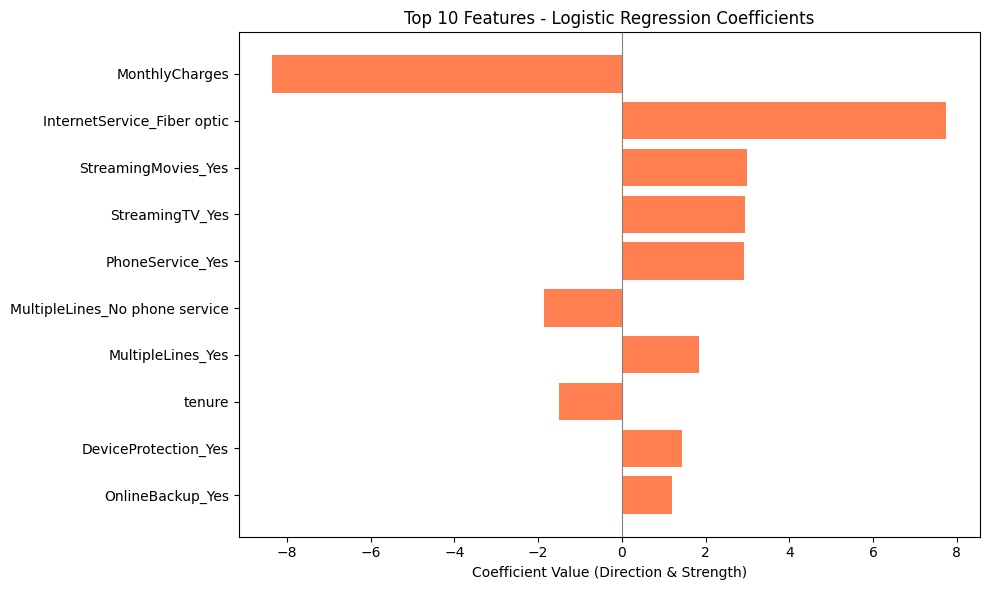

In [92]:
coefficients = model.coef_[0]
features = X_train.columns

# Create a DataFrame
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])

# Sort by absolute value (strength of effect)
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='coral')
plt.axvline(0, color='gray', linewidth=0.8)
plt.title("Top 10 Features - Logistic Regression Coefficients")
plt.xlabel("Coefficient Value (Direction & Strength)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# XGBOOST model after SMOTE

In [81]:
#  Define the parameter grid
param_grid = {
    'n_estimators': [100, 200,300,400],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'scale_pos_weight': [1, 2, 3]  # Useful for class imbalance
}

#  Initialize the XGBoost classifier
xgb_clf = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='roc_auc',      # Or 'accuracy', 'f1', etc.
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit on training data (use resampled data if needed, like X_train_res/y_train_res)
grid_search.fit(X_train_res, y_train_res)

#  Best model evaluation
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))


Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:46:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 400, 'scale_pos_weight': 2}

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81      1033
           1       0.51      0.71      0.59       374

    accuracy                           0.74      1407
   macro avg       0.69      0.73      0.70      1407
weighted avg       0.78      0.74      0.75      1407


Confusion Matrix:
 [[779 254]
 [110 264]]

ROC AUC Score: 0.8006520129833153


# **Random Forest model after SMOTE**

In [84]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced'  # Helps with imbalanced data
)
rf_model.fit(X_train_res, y_train_res)

# 2. Make predictions
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

# 3. Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(" ROC AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      1033
           1       0.55      0.64      0.59       374

    accuracy                           0.76      1407
   macro avg       0.70      0.72      0.71      1407
weighted avg       0.78      0.76      0.77      1407

 Confusion Matrix:
 [[834 199]
 [135 239]]
 ROC AUC Score: 0.8162702993720589


In [85]:
#  Define the parameter grid
param_grid = {
    'n_estimators': [100, 200,300,400],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': [None, 'balanced']  # To handle class imbalance
}

#  Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

#  GridSearchCV setup
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the model (use X_train_res and y_train_res if using resampled data)
grid_search_rf.fit(X_train_res, y_train_res)

#  Predict and evaluate
best_rf_model = grid_search_rf.best_estimator_

y_pred_rf = best_rf_model.predict(X_test)
y_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]

print("Best Parameters:", grid_search_rf.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba_rf))


Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      1033
           1       0.54      0.65      0.59       374

    accuracy                           0.76      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.78      0.76      0.77      1407


Confusion Matrix:
 [[830 203]
 [132 242]]

ROC AUC Score: 0.8176926143158134
